In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#reading data
data=pd.read_csv("Reddit_Data.csv",nrows=1000)

In [ ]:
data


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
995,vote for government rather than candidate the ...,-1
996,going vote for modiji and hope you guys would...,0
997,tharoor case national importance with the ment...,-1
998,can someone the media investigate who raga hum...,-1


In [ ]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
data.value_counts()

clean_comment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             category
                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
data.isnull().sum()

clean_comment    2
category         0
dtype: int64

In [ ]:
data.dropna(axis = 0, inplace = True)

In [ ]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [ ]:
data

,clean_comment,category
0,88,1
1,411,1
2,757,-1
3,907,0
4,502,1
...,...,...
995,870,-1
996,105,0
997,796,-1
998,421,-1


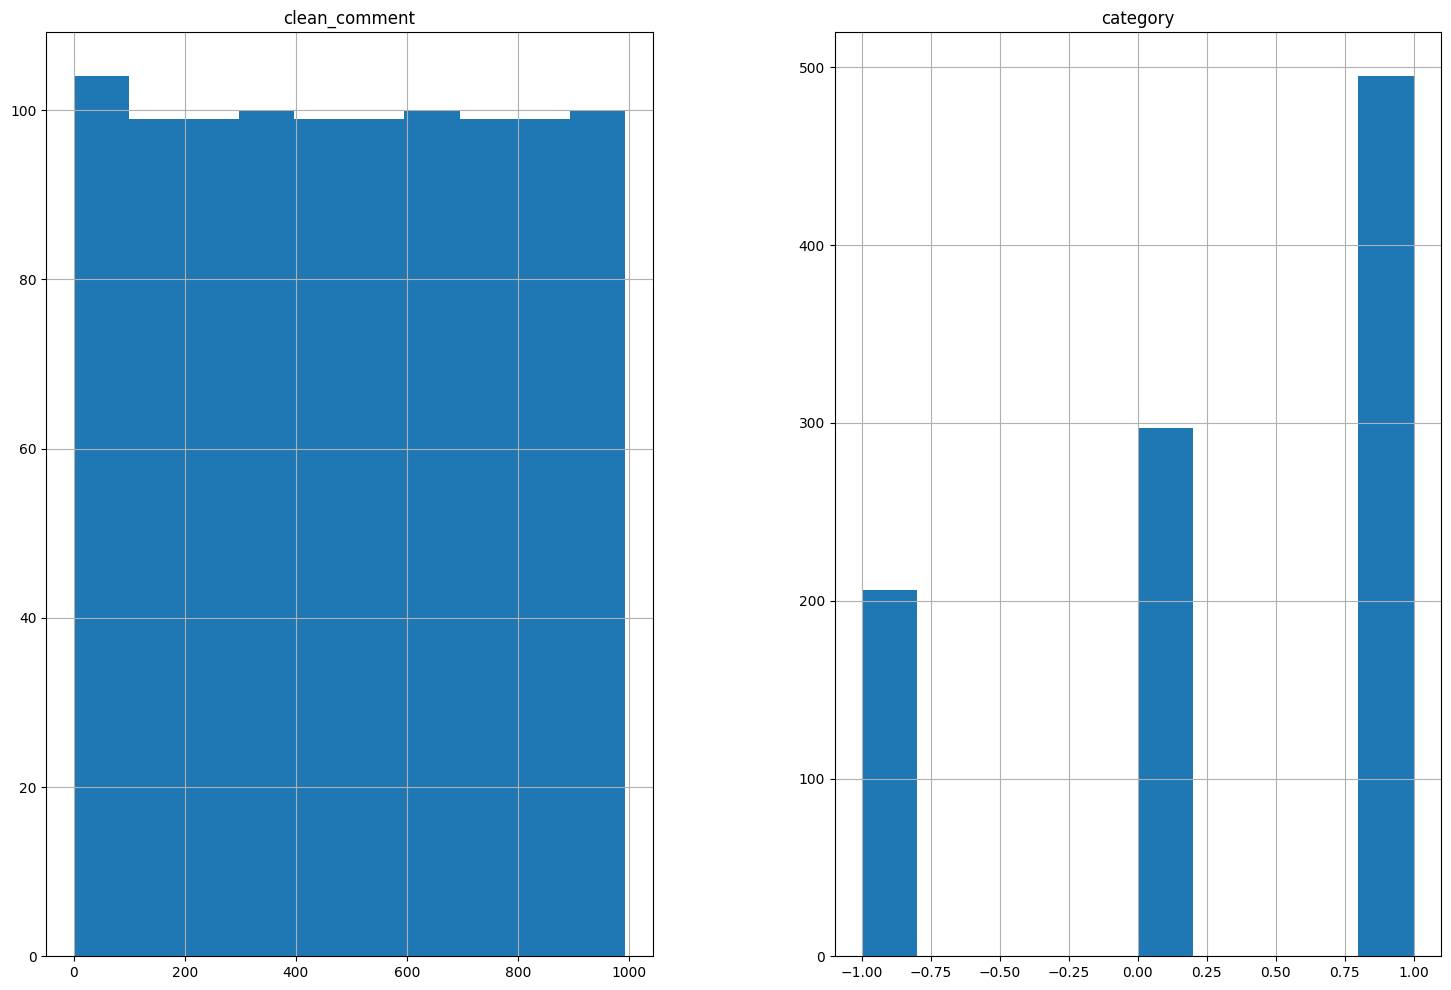

In [ ]:
data.hist(figsize=(18,12))
plt.show()

In [ ]:
data.corr()

,clean_comment,category
clean_comment,1.00000,-0.01732
category,-0.01732,1.00000


<Axes: >

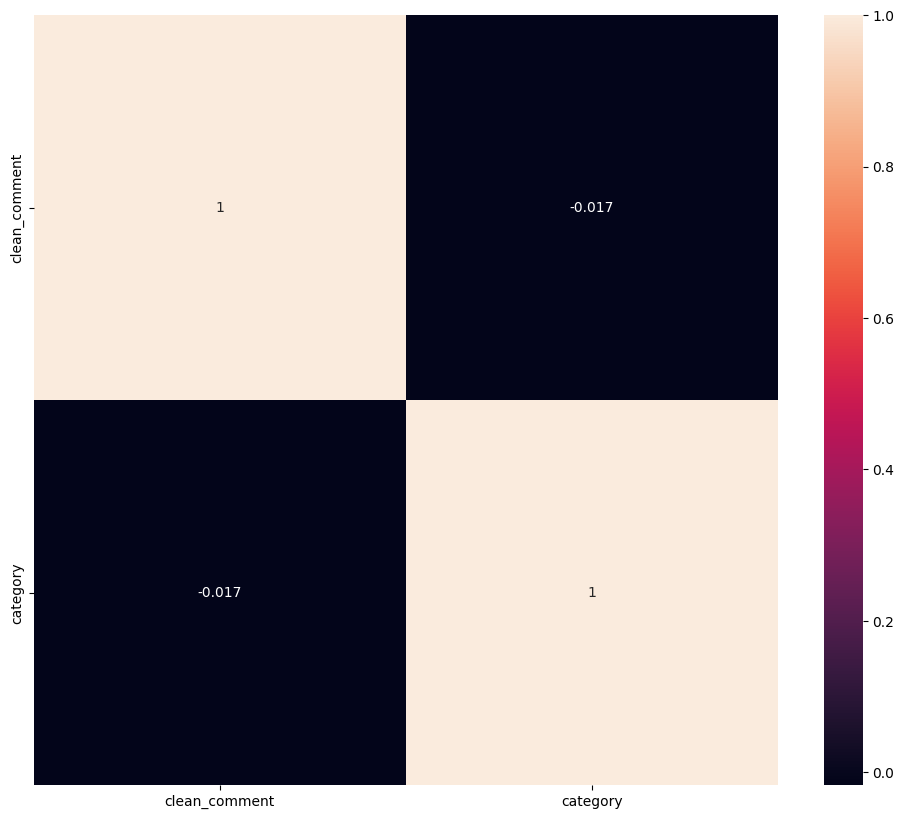

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

In [ ]:
data.shape

(998, 2)

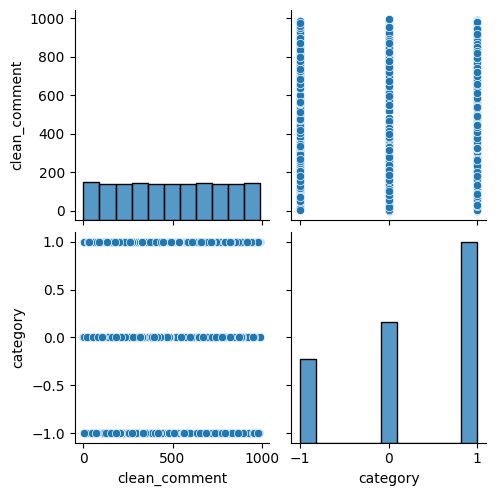

In [ ]:
sns.pairplot(data=data)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text


In [ ]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [ ]:
data

,clean_comment,category
0,88,1
1,411,1
2,757,-1
3,907,0
4,502,1
...,...,...
995,870,-1
996,105,0
997,796,-1
998,421,-1


In [ ]:
y=data['category']
x=data.drop('category',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

798
200
798
200


In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train,y_train,batch_size = 10,
    epochs=200,
)


Epoch 1/200
80/80 [==============================] - 2s 3ms/step - loss: 0.6872 - accuracy: 0.2882
Epoch 2/200
80/80 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.2932
Epoch 3/200
80/80 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.2932
Epoch 4/200
80/80 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.2932
Epoch 5/200
80/80 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.2932
Epoch 6/200
80/80 [==============================] - 0s 3ms/step - loss: 0.5932 - accuracy: 0.2932
Epoch 7/200
80/80 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.2932
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.2932
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.2932
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.2932
Epoch 11/

In [ ]:
classifier.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.3150


[0.6543107032775879, 0.3149999976158142]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

          -1       0.21      0.26      0.24        34
           0       0.49      0.33      0.40        63
           1       0.54      0.60      0.57       103

    accuracy                           0.46       200
   macro avg       0.41      0.40      0.40       200
weighted avg       0.47      0.46      0.46       200

Confusion Matrix:
 [[ 9  4 21]
 [10 21 32]
 [23 18 62]]
Training Score:
 59.899749373433586


In [ ]:
knn.score(x_test,y_test)*100

46.0